In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define correct data folder
data_folder = "/home/sagemaker-user/ads-508-team/data"

# Load Data with Robust Error Handling
try:
    cardio_df = pd.read_csv(os.path.join(data_folder, "processed_cardio_train.csv"), delimiter=";")
    quitline_df = pd.read_csv(os.path.join(data_folder, "processed_quitline_services.csv"), delimiter=";", on_bad_lines="skip")  # Skip bad lines
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

# -----------------------------
# 1. Check Missing Values
# -----------------------------
plt.figure(figsize=(10, 5))

# Calculate missing values
missing_values = cardio_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing data

if not missing_values.empty:
    missing_values.plot(kind='bar', color='red')
    plt.title("Missing Values in Cardio Data")
    plt.ylabel("Count")
    plt.xlabel("Columns")
    plt.show()
else:
    print("No missing values found in Cardio Data.")


Data loaded successfully!
No missing values found in Cardio Data.


<Figure size 1000x500 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

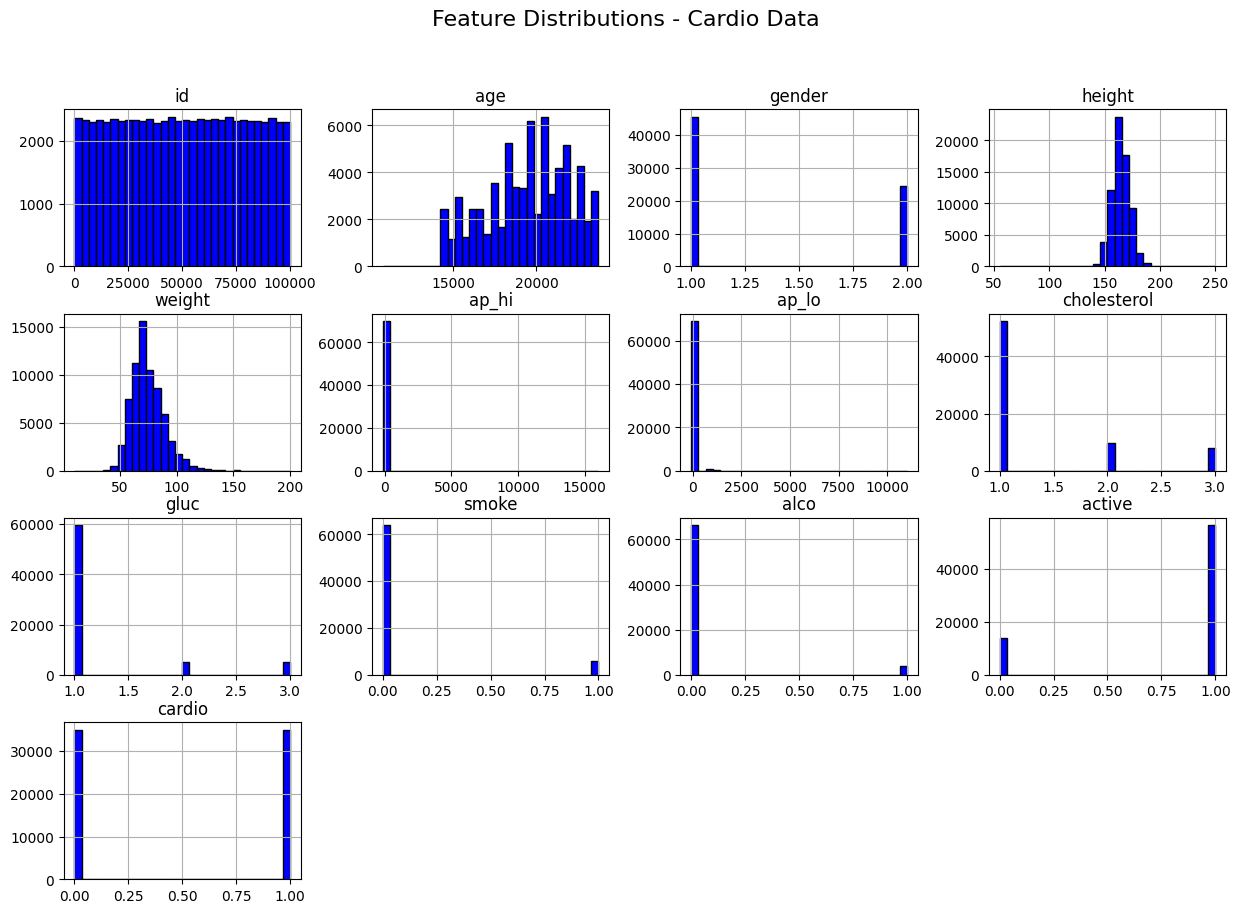

In [9]:
# -----------------------------
# 2. Feature Distributions
# -----------------------------
plt.figure(figsize=(15, 10))

# Filter only numeric columns
numeric_cols = cardio_df.select_dtypes(include=['number'])

# Check if numeric columns exist before plotting
if not numeric_cols.empty:
    numeric_cols.hist(figsize=(15, 10), bins=30, color='blue', edgecolor='black')
    plt.suptitle("Feature Distributions - Cardio Data", fontsize=16)
    plt.show()
else:
    print("No numeric columns found in the dataset. Check data types and ingestion process.")



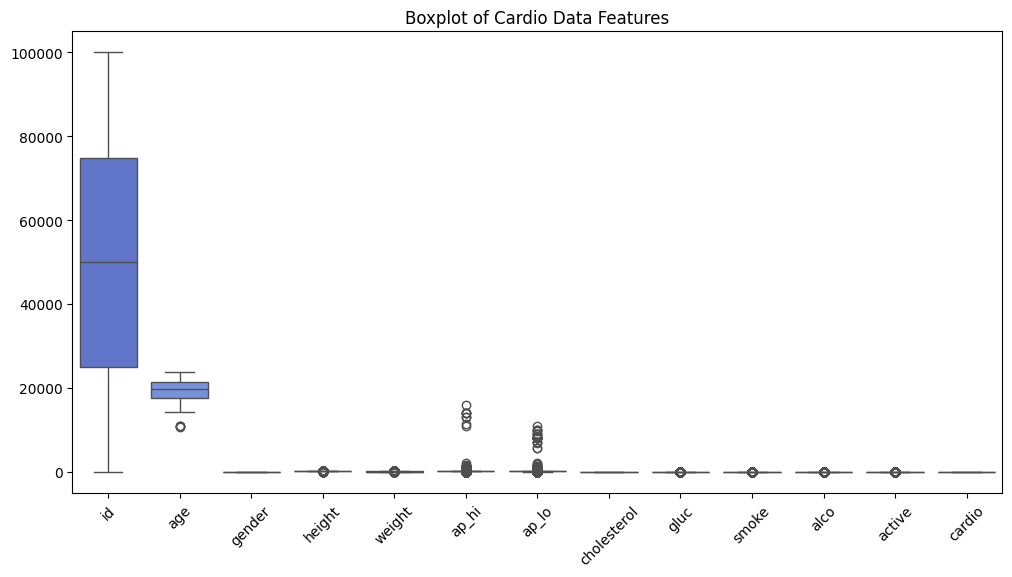

In [11]:
# -----------------------------
# 3. Boxplots to Check Outliers
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=cardio_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Cardio Data Features")
plt.show()



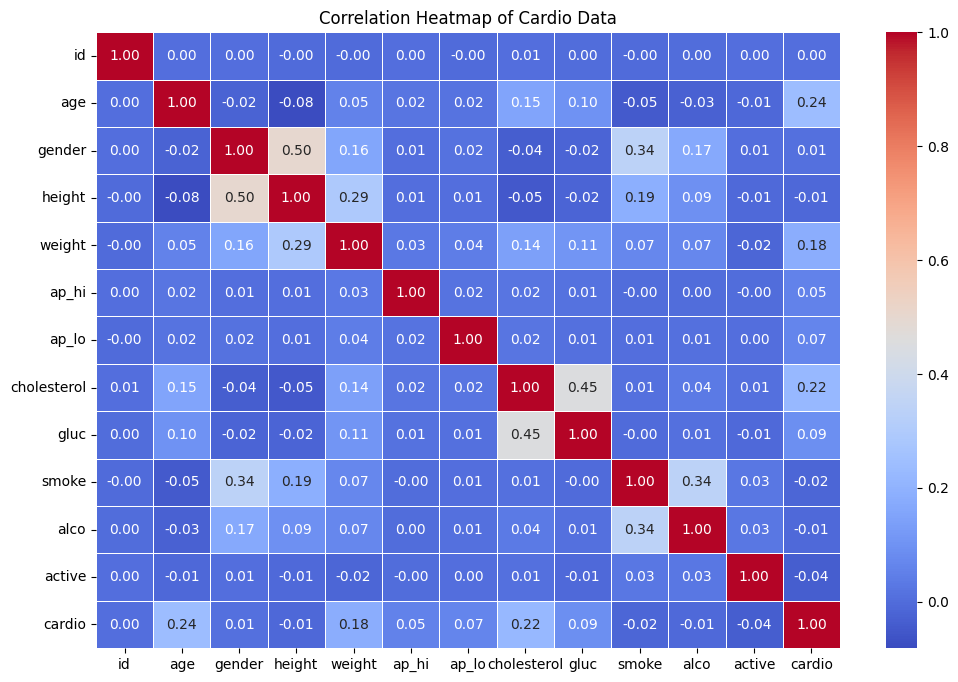

In [12]:
# -----------------------------
# 4. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(cardio_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Cardio Data")
plt.show()


/tmp/ipykernel_2335/3997483717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cardio_df, x="gender", palette="coolwarm")


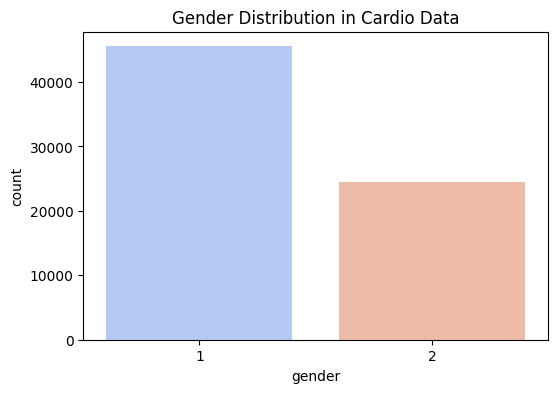

Data visualization complete!


In [15]:
# -----------------------------
# 5. Categorical Data Distribution
# -----------------------------
if 'gender' in cardio_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=cardio_df, x="gender", palette="coolwarm")
    plt.title("Gender Distribution in Cardio Data")
    plt.show()

# Repeat for Quitline Data if needed
print("Data visualization complete!")
